<a href="https://colab.research.google.com/github/AndreaCastiella/Natural-Language-Processing-in-Tensorflow/blob/main/Course_3_Week_3_Lesson_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.4.1


In [2]:
# Get the data

dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete024SZ6/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete024SZ6/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete024SZ6/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [8]:
NUM_EPOCHS=10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 92s 148ms/step - loss: 0.6187 - acc: 0.6352 - val_loss: 0.4464 - val_acc: 0.8059
Epoch 2/10
391/391 [==============================] - 58s 146ms/step - loss: 0.3819 - acc: 0.8382 - val_loss: 0.4525 - val_acc: 0.8190
Epoch 3/10
391/391 [==============================] - 58s 146ms/step - loss: 0.3058 - acc: 0.8807 - val_loss: 0.3947 - val_acc: 0.8305
Epoch 4/10
391/391 [==============================] - 58s 147ms/step - loss: 0.2248 - acc: 0.9175 - val_loss: 0.4661 - val_acc: 0.7900
Epoch 5/10
391/391 [==============================] - 58s 147ms/step - loss: 0.6016 - acc: 0.6881 - val_loss: 0.5480 - val_acc: 0.8036
Epoch 6/10
391/391 [==============================] - 58s 147ms/step - loss: 0.2870 - acc: 0.8916 - val_loss: 0.4486 - val_acc: 0.8250
Epoch 7/10
391/391 [==============================] - 58s 148ms/step - loss: 0.1944 - acc: 0.9303 - val_loss: 0.4827 - val_acc: 0.8236
Epoch 8/10
391/391 [==============================] - 5

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

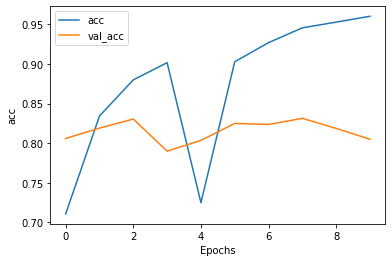

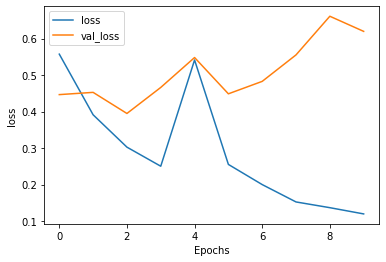

In [11]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')